# Import Library

In [1]:
import numpy as np
import matplotlib.pyplot as plt

# Load Data

t: time  
f: failures  
cum_f: cumulative failures

In [2]:
data = np.loadtxt('J1.csv', delimiter=',', skiprows=1, dtype=int)

In [3]:
t = data[:, 0]
# f = data[:, 1]
cum_f = data[:, 2]

# Laplace Trend

Calculation of Laplace Trend Values

In [4]:
def laplace_trend(t, cum_f):
    laplace = -((np.sum(cum_f) - ((t + 1) / 2) * cum_f[-1])
                / np.sqrt(((t**2 - 1) / 12) * cum_f[-1]))
    return laplace

laplace_trend_values = []
for i in range(len(t)):
    laplace_trend_values.append(laplace_trend(t[i], cum_f[:i+1]))

laplace_trend_values = np.array(laplace_trend_values)
laplace_trend_values = np.nan_to_num(laplace_trend_values, nan=0.0)

print("Laplace Trend Values:", laplace_trend_values)

Laplace Trend Values: [ 0.         -1.88982237 -2.16506351 -2.84604989 -2.59272486 -1.35224681
 -2.02072594 -0.26462806  1.04984471  0.42640143 -0.38729833 -0.0836242
  1.73719807  1.6087777   1.26515207  1.21002939  0.46159309  0.28419108
  0.59385745 -0.04905115 -0.63058414 -1.15913868 -1.64164552 -2.08387599
 -1.98076923 -2.38521084 -2.75965607 -2.59437997 -2.20053536 -0.11208469
  0.43182474  0.53421302  0.43997763  0.7203983   0.61579354  0.15754599
 -0.0914283  -0.14176396 -0.55250625 -0.75724935 -0.58473518 -0.96431437
 -1.14257478 -0.42161201 -0.44659449 -0.81350306 -0.30936052  0.93900724
  1.00245461  1.06148709  0.96785095  0.72998946  0.35223498  0.44123625
  0.07825749  0.02995985 -0.31574739 -0.49771315 -0.82404192 -0.98630404
 -1.29516176 -1.28645363]


/tmp/ipykernel_75500/3811906286.py:2: RuntimeWarning: invalid value encountered in scalar divide
  laplace = -((np.sum(cum_f) - ((t + 1) / 2) * cum_f[-1])


# Visualization of Laplace Trend and SRGMs

Prepare SRGM Functions

In [5]:
# Goel-Okumoto Model
def goel_okumoto(t, a, b):
    return a * (1 - np.exp(-b * t))


# Delayed S-Shaped Model
def delayed_s(t, a, b):
    return a * (1 - (1 + b * t) * np.exp(-b * t))


# Inflection S-Shaped Model
def inflection_s(t, a, b, c):
    return a * (1 - np.exp(-b * t)) / (1 + c * np.exp(-b * t))


# Weibull Model
def weibull(t, a, b, c):
    return a * (1 - np.exp(-b * t**c))


# Log-Logistic Model
def log_logistic(t, a, b, c):
    return a * (b * t)**c / (1 + (b * t)**c)

Setting of Optimal Parameters

In [6]:
# Goel-Okumoto parameters
go_a = 1781.2851597983463
go_b = 0.001313656118131964

# Delayed S-Shaped parameters
dss_a = 162.93018698568068
dss_b = 0.049298638348217474

# Inflection S-Shaped parameters
iss_a = 435.23929305644157
iss_b = 0.010922176325326084
iss_c = 1.0631120291348246

# Weibull parameters
we_a = 7479.084761258814
we_b = 0.0003298148200578028
we_c = 0.9799381532939042

# Log-Logistic parameters
ll_a = 12600.606454981924
ll_b = 0.00016537652135568346
ll_c = 0.9809009035727211

Prepare SRGM Graph Data

In [7]:
goel_okumoto_values = goel_okumoto(t, go_a, go_b)
delayed_s_values = delayed_s(t, dss_a, dss_b)
inflection_s_values = inflection_s(t, iss_a, iss_b, iss_c)
weibull_values = weibull(t, we_a, we_b, we_c)
log_logistic_values = log_logistic(t, ll_a, ll_b, ll_c)

goel_okumoto_values = np.insert(goel_okumoto_values, 0, 0)
delayed_s_values = np.insert(delayed_s_values, 0, 0)
inflection_s_values = np.insert(inflection_s_values, 0, 0)
weibull_values = np.insert(weibull_values, 0, 0)
log_logistic_values = np.insert(log_logistic_values, 0, 0)

Plot Laplace Trend and SRGM Graphs

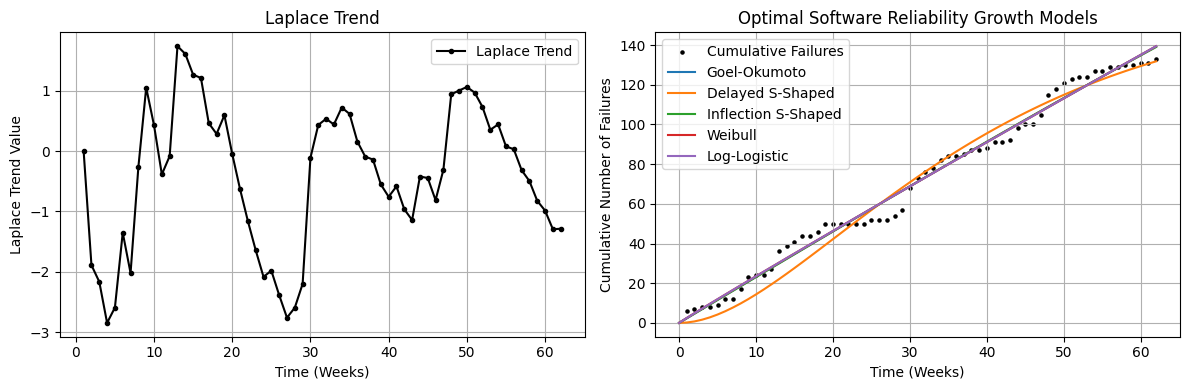

In [8]:
t_add_zero = np.insert(t, 0, 0)

fig, axes = plt.subplots(1, 2, figsize=(12, 4))

axes[0].plot(t, laplace_trend_values,
             label='Laplace Trend', color='black', marker='.')
axes[0].set_title('Laplace Trend')
axes[0].set_xlabel('Time (Weeks)')
axes[0].set_ylabel('Laplace Trend Value')
axes[0].legend()
axes[0].grid()

axes[1].scatter(t, cum_f, label='Cumulative Failures', color='black', s=5)
axes[1].plot(t_add_zero, goel_okumoto_values, label='Goel-Okumoto')
axes[1].plot(t_add_zero, delayed_s_values, label='Delayed S-Shaped')
axes[1].plot(t_add_zero, inflection_s_values, label='Inflection S-Shaped')
axes[1].plot(t_add_zero, weibull_values, label='Weibull')
axes[1].plot(t_add_zero, log_logistic_values, label='Log-Logistic')
axes[1].set_title('Optimal Software Reliability Growth Models')
axes[1].set_xlabel('Time (Weeks)')
axes[1].set_ylabel('Cumulative Number of Failures')
axes[1].legend()
axes[1].grid()

plt.tight_layout()
plt.savefig('.img/laplace_trend_and_srgms.png', dpi=300, bbox_inches='tight')